In [3]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import time

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# load csv files to numpy arrays
def load_data(data_dir):
    train_data = open(data_dir + "train.csv").read()
    train_data = train_data.split("\n")[1:-1]
    train_data = [i.split(",") for i in train_data]
    # print(len(train_data))
    X_train = np.array([[int(i[j]) for j in range(1,len(i))] for i in train_data])
    y_train = np.array([int(i[0]) for i in train_data])

    # print(X_train.shape, y_train.shape)

    test_data = open(data_dir + "test.csv").read()
    test_data = test_data.split("\n")[1:-1]
    test_data = [i.split(",") for i in test_data]
    # print(len(test_data))
    X_test = np.array([[int(i[j]) for j in range(0,len(i))] for i in test_data])

    # print(X_test.shape)

    return X_train, y_train, X_test


class simple_knn():
    "a simple kNN with L2 distance"

    def __init__(self):
        pass

    def train(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X, k=1):
        dists = self.compute_distances(X)
        # print("computed distances")

        num_test = dists.shape[0]
        y_pred = np.zeros(num_test)

        for i in range(num_test):
            k_closest_y = []
            labels = self.y_train[np.argsort(dists[i,:])].flatten()
            # find k nearest lables
            k_closest_y = labels[:k]

            # out of these k nearest lables which one is most common
            # for 5NN [1, 1, 1, 2, 3] returns 1
            # break ties by selecting smaller label
            # for 5NN [1, 2, 1, 2, 3] return 1 even though 1 and 2 appeared twice.
            c = Counter(k_closest_y)
            y_pred[i] = c.most_common(1)[0][0]

        return(y_pred)

    def compute_distances(self, X):
        num_test = X.shape[0]
        num_train = self.X_train.shape[0]

        dot_pro = np.dot(X, self.X_train.T)
        sum_square_test = np.square(X).sum(axis = 1)
        sum_square_train = np.square(self.X_train).sum(axis = 1)
        dists = np.sqrt(-2 * dot_pro + sum_square_train + np.matrix(sum_square_test).T)

        return(dists)

In [6]:
data_dir = "./data/"
X_train, y_train, X_test = load_data(data_dir)

In [5]:
print(X_train.shape, y_train.shape, X_test.shape)

((42000, 784), (42000,), (28000, 784))


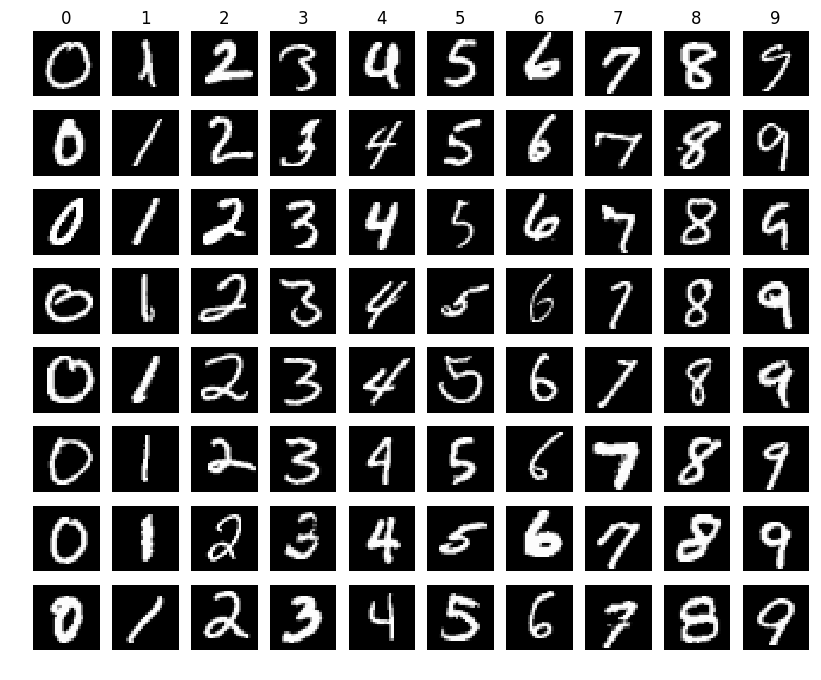

In [9]:
# runs for 10 seconds
classes = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]
num_classes = len(classes)
samples = 8

for y, cls in enumerate(classes):
    idxs = np.nonzero([i == y for i in y_train])
    idxs = np.random.choice(idxs[0], samples, replace=False)
    for i , idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples, num_classes, plt_idx)
        plt.imshow(X_train[idx].reshape((28, 28)))
        plt.axis("off")
        if i == 0:
            plt.title(cls)
        

plt.show()

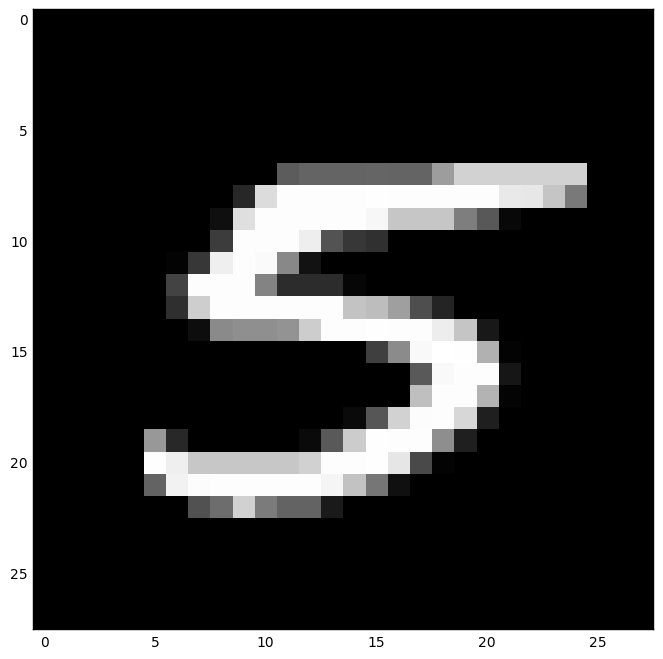

In [10]:
# just to visualize ith test image
plt.imshow(X_test[2311].reshape((28, 28)))

In [11]:
# predict labels for batch_size number of test images at a time.
batch_size = 2000
# k = 3
k = 1
classifier = simple_knn()
classifier.train(X_train, y_train)

In [ ]:
# runs for 13 minutes
predictions = []

for i in range(int(len(X_test)/(2*batch_size))):
    # predicts from i * batch_size to (i+1) * batch_size
    print("Computing batch " + str(i+1) + "/" + str(int(len(X_test)/batch_size)) + "...")
    tic = time.time()
    predts = classifier.predict(X_test[i * batch_size:(i+1) * batch_size], k)
    toc = time.time()
    predictions = predictions + list(predts)
#     print("Len of predictions: " + str(len(predictions)))
    print("Completed this batch in " + str(toc-tic) + " Secs.")

print("Completed predicting the test data.")

Computing batch 1/14...
Completed this batch in 70.9579939842 Secs.
Computing batch 2/14...


In [ ]:
# runs for 13 minutes
# uncomment predict lines to predict second half of test data

for i in range(int(len(X_test)/(2*batch_size)), int(len(X_test)/batch_size)):
    # predicts from i * batch_size to (i+1) * batch_size
    print("Computing batch " + str(i+1) + "/" + str(int(len(X_test)/batch_size)) + "...")
    tic = time.time()
    #predts = classifier.predict(X_test[i * batch_size:(i+1) * batch_size], k)
    toc = time.time()
    #predictions = predictions + list(predts)
#     print("Len of predictions: " + str(len(predictions)))
    print("Completed this batch in " + str(toc-tic) + " Secs.")

print("Completed predicting the test data.")

In [ ]:
out_file = open("predictions.csv", "w")
out_file.write("ImageId,Label\n")
for i in range(len(predictions)):
    out_file.write(str(i+1) + "," + str(int(predictions[i])) + "\n")
out_file.close()